In [6]:
import os
os.chdir("..")

In [7]:

print(os.getcwd())

/home/ali/tum/motion_planning/social_ai_practical_course


In [9]:
# Import libraries and data
import os
import numpy as np
import pickle


from config.settings import ROOT_DIR, saved_models_path
from src.utils.linear_regressor import perform_linear_regression
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns




# Distance model (5 parameters)
Here we solve the following model

$$ s_i(k+1) = s_i(k) +\theta_{s_1}  s_i(k-1) +\theta_{s_2} s_i(k-2) +\theta_{s_3} v_i(k)   +\theta_{s_4} v_i(k-1) 
+\theta_{s_5} a_i(k)$$



## Data shifting


In [10]:
X_x= np.vstack((
    s_x[2:-1],        #s[k]   
    s_x[1:-2],        #s[k-1]
    s_x[ :-3],        #s[k-2]
    v_x[2:-1],        #v[k]
    v_x[1:-2],        #v[k-1]
    a_x[2:-1]         #a[k]
    )).T

y_x = s_x[3:]
print("A matrix: " + str(X_x.shape))
print("target matrix: " + str(np.array(y_x).shape))

A matrix: (451, 6)
target matrix: (451,)


In [11]:
X_y = np.vstack((
    s_y[2:-1],        #s[k]   
    s_y[1:-2],        #s[k-1]
    s_y[ :-3],        #s[k-2]
    v_y[2:-1],        #v[k]
    v_y[1:-2],        #v[k-1]
    a_y[2:-1]         #a[k]
    )).T

y_y = s_y[3:]
print("A matrix: " + str(X_y.shape))
print("target matrix: " + str(np.array(y_y).shape))

A matrix: (451, 6)
target matrix: (451,)


### Perform Linear Regression


Linear regression with 6 parameters
Mean Squared Error (MSE): 5.4060e-07
Mean Absolute Error (MAE): 5.8154e-04
R-squared (R²) Score: 1.0000e+00
Coefficients:
1.8347051758450532
-0.9168846220044963
0.08216020989522888
0.16337810270810182
-0.15359073097268133
-0.005129157274475114


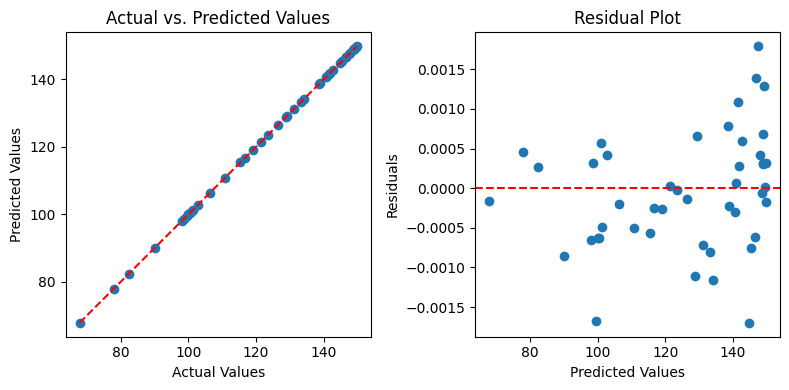

Mean Squared Error (MSE): 3.4597e-07
Mean Absolute Error (MAE): 4.9455e-04
R-squared (R²) Score: 1.0000e+00
Coefficients:
1.8540469852332635
-0.9017545683570556
0.04770956047212771
0.1300526964865959
-0.12231555881433087
-0.0035967922979102535


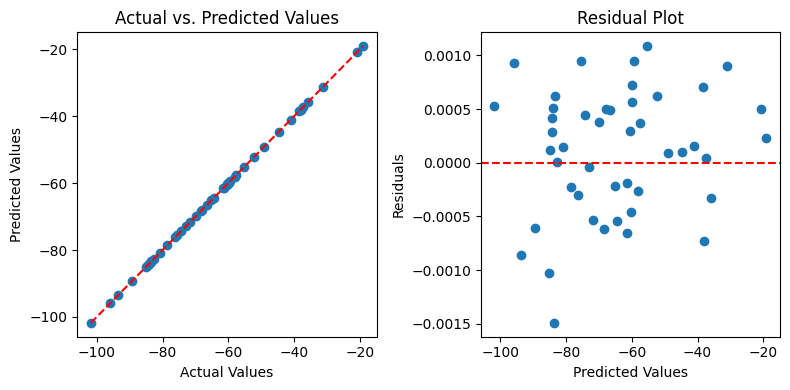

In [12]:
print("Linear regression with 6 parameters")
first_model = perform_linear_regression(X_x, y_x)
second_model = perform_linear_regression(X_y, y_y)

In [13]:
# Save both models in a pickle file
def save_model(model, model_name):
    model_file_path = os.path.join(saved_models_path, f'dist_model_5/{model_name}.pkl')
    
    with open(model_file_path, 'wb') as file:
        pickle.dump(model, file)
    
    print(f'Model "{model_name}" saved to: {model_file_path}')

save_model(first_model, 'first_model')
save_model(second_model, 'second_model')



Model "first_model" saved to: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/dist_model_5/first_model.pkl
Model "second_model" saved to: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/dist_model_5/second_model.pkl
